### Question 3

In [9]:
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np
from scipy.sparse.csgraph import shortest_path
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import scipy.sparse.linalg as ll
from scipy.linalg import eigh
import random

#### Part 1

In [10]:
faces = spio.loadmat("isomap.mat", squeeze_me=True)["images"].T

m, n = faces.shape

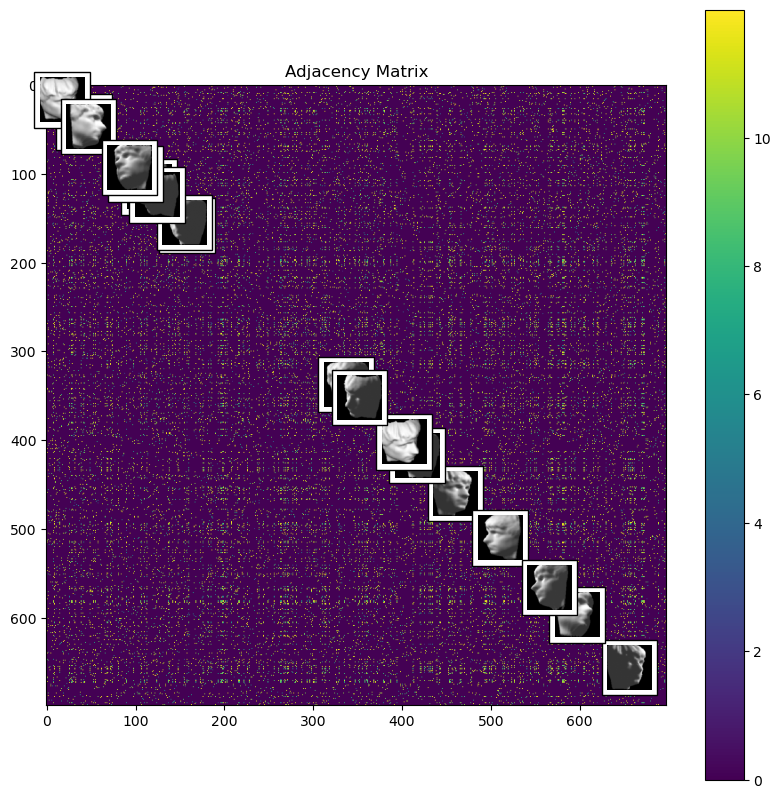

In [11]:
# Create weighted adjacency matrix A by computing pairwise Euclidean distance
# Code below is adapted from https://jaykmody.com/blog/distance-matrices-with-numpy/

np.random.seed(6740)


x1 = np.sum(faces**2, axis=1)
x2 = x1.T
dot_products = np.matmul(faces, faces.T)

# Compute the squared distance
squared_dist = x1[:, None] + x2[None, :] - 2 * dot_products
# Due to floating point precision, there exist negative numbers which should have been rounded to zeros
squared_dist = np.where(squared_dist < 0, 0, squared_dist)

# Compute the L2 norm of the distances
distance_mat = np.sqrt(squared_dist)

# Use the optimal epsilon determined in part 2
epsilon = 12

# If any distance is over epsilon, then set it to 0
A = np.where(distance_mat <= epsilon, distance_mat, 0)


# Display the adjacency matrix with some images
# Code below is adapted from https://stackoverflow.com/questions/4860417/placing-custom-images-in-a-plot-window-as-custom-data-markers-or-to-annotate-t/4872190
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the heat map of adjacency matrix
heat_map = ax.imshow(A)
plt.colorbar((heat_map))

rand_indx = np.random.randint(0, 698, 18)

for indx in rand_indx:
    img = faces[indx].reshape(64, 64)
    img = np.rot90(img, -1)
    imagebox = OffsetImage(img, zoom=0.5, cmap="gray")
    ab = AnnotationBbox(imagebox, (indx, indx))
    ax.add_artist(ab)

plt.title("Adjacency Matrix")
plt.show()

In [12]:
def isomap(epsilon):
    np.random.seed(6740)
    # If any distance is over epsilon, then set it to 0
    A = np.where(distance_mat <= epsilon, distance_mat, 0)

    # Get the shortest path matrix D
    D = shortest_path(A, directed=False)

    # Compute D^2 element wise
    D_2 = D**2

    H = np.eye(m) - 1 / m * np.ones((m, m))
    C = -(1 / 2) * H @ D_2 @ H

    S, W = eigh(C)
    idx_sorted = np.argsort(S)
    S = S[idx_sorted[-2:]].real
    # print(f"{S = }")
    W = W[:, idx_sorted[-2:]].real
    # print(f"{W = }")

    # Negative sign is added to ensure that sculptures facing right should be positioned on the right side of the graph and vice versa
    dim1 = -W[:, 1] * np.sqrt(S[1])  # Dimension of the largest eigenvalue
    dim2 = W[:, 0] * np.sqrt(S[0])  # Dimension of the second largest eigenvalue

    return (D, dim1, dim2)

#### Part 2

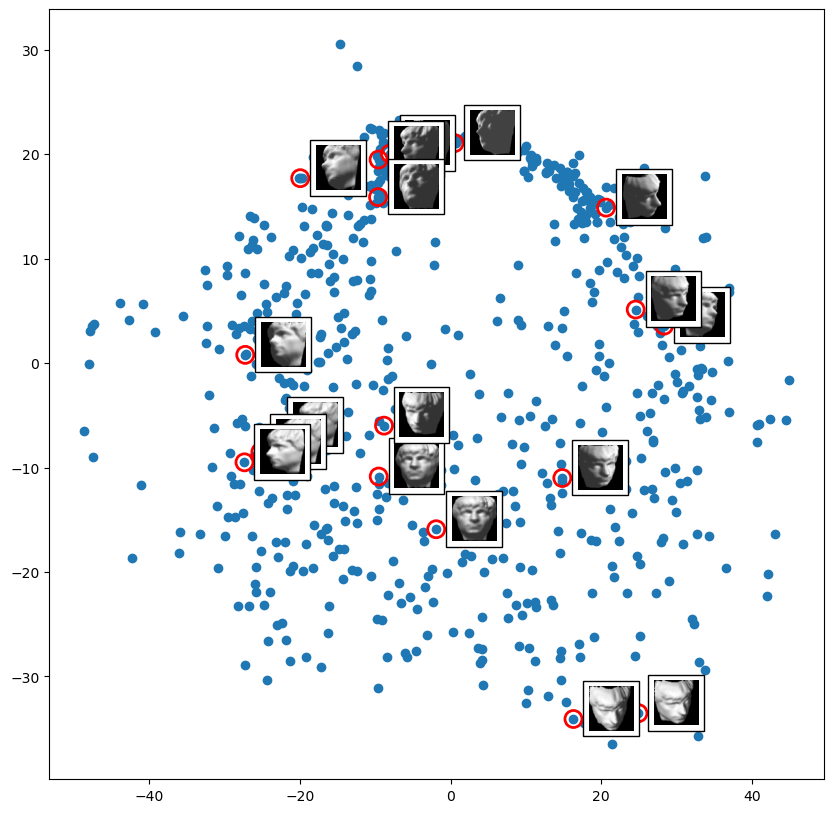

In [13]:
random.seed(6740)


D, dim1, dim2 = isomap(epsilon=12)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(dim1, dim2)

rand_indx = np.random.choice(698, 18, replace=False)

for indx in rand_indx:

    img = faces[indx, :].reshape(64, 64).T
    imagebox = OffsetImage(img, zoom=0.5, cmap="gray")
    ab = AnnotationBbox(imagebox, (dim1[indx] + 5, dim2[indx] + 1), zorder=3)
    ax.add_artist(ab)
    ax.scatter(
        dim1[indx],
        dim2[indx],
        s=150,
        facecolors="none",
        edgecolors="r",
        linewidth=2,
        zorder=2,
    )

plt.show()

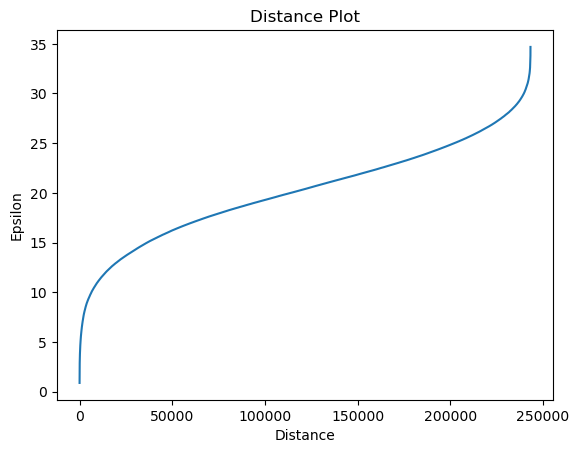

In [14]:
# Code adapted from https://stackoverflow.com/questions/8905501/extract-upper-or-lower-triangular-part-of-a-numpy-matrix
dists = distance_mat[np.triu_indices_from(distance_mat, k=1)]
sorted_distances = np.sort(dists)

plt.plot(sorted_distances)
plt.xlabel("Distance")
plt.ylabel("Epsilon")
plt.title("Distance Plot")
plt.show()

#### Part 3

In [15]:
from sklearn.decomposition import PCA

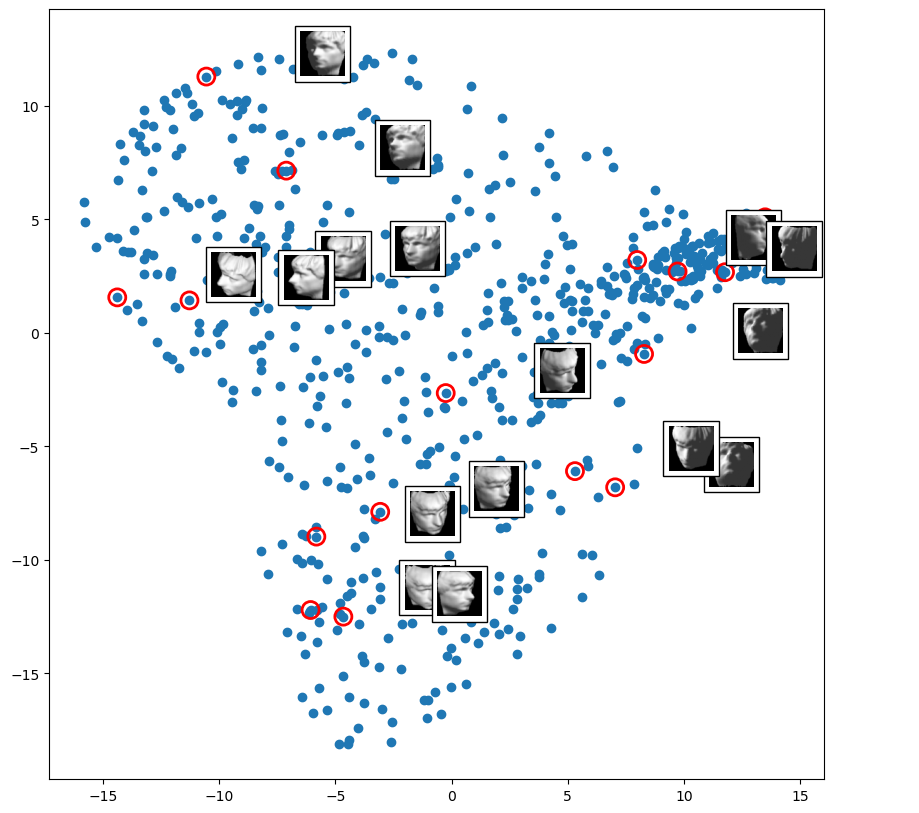

In [16]:
# Code ideas referenced from https://machinelearningmastery.com/principal-component-analysis-for-visualization/
np.random.seed(6740)

pca = PCA(n_components=2)
X = pca.fit_transform(faces)

# Add negative signs to flip the positions at which images are placed at
pca_dim1 = -X[:, 0]
pca_dim2 = -X[:, 1]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(pca_dim1, pca_dim2)

rand_indx = np.random.choice(698, 18, replace=False)

for indx in rand_indx:

    img = faces[indx, :].reshape(64, 64).T
    imagebox = OffsetImage(img, zoom=0.5, cmap="gray")
    ab = AnnotationBbox(imagebox, (pca_dim1[indx] + 5, pca_dim2[indx] + 1), zorder=3)
    ax.add_artist(ab)
    ax.scatter(
        pca_dim1[indx],
        pca_dim2[indx],
        s=150,
        facecolors="none",
        edgecolors="r",
        linewidth=2,
        zorder=2,
    )

plt.show()